In [3]:
import numpy as np
import utils

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import pandas as pd
from pandas.tools.plotting import parallel_coordinates

from itertools import cycle, islice

import matplotlib.pyplot as plt

In [4]:
data_path = '/Users/kayshahbaaz/Desktop/minute_weather.csv'

In [5]:
data = pd.read_csv(data_path)

In [6]:
data.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [7]:
data.shape

(1587257, 13)

In [8]:
sampled_data = data[data['rowID'] % 10 ==0]

In [9]:
sampled_data.shape

(158726, 13)

In [10]:
sampled_data.describe()

,rowID,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
count,1.587260e+05,158726.000000,158726.000000,158680.000000,158680.000000,158680.000000,158680.000000,158680.000000,158680.000000,158725.000000,158725.000000,158726.000000
mean,7.936250e+05,916.830161,61.851589,162.156100,2.775215,163.462144,3.400558,166.774017,2.134664,0.000318,0.409627,47.609470
std,4.582039e+05,3.051717,11.833569,95.278201,2.057624,92.452139,2.418802,97.441109,1.742113,0.011236,8.665523,26.214409
min,0.000000e+00,905.000000,31.640000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.900000
25%,3.968125e+05,914.800000,52.700000,62.000000,1.300000,68.000000,1.600000,76.000000,0.800000,0.000000,0.000000,24.700000
50%,7.936250e+05,916.700000,62.240000,182.000000,2.200000,187.000000,2.700000,180.000000,1.600000,0.000000,0.000000,44.700000
75%,1.190438e+06,918.700000,70.880000,217.000000,3.800000,223.000000,4.600000,212.000000,3.000000,0.000000,0.000000,68.000000
max,1.587250e+06,929.500000,99.500000,359.000000,31.900000,359.000000,36.000000,359.000000,31.600000,3.120000,2960.000000,93.000000


In [11]:
sampled_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rowID,158726.0,793625.000000,458203.937509,0.00,396812.5,793625.00,1190437.50,1587250.00
air_pressure,158726.0,916.830161,3.051717,905.00,914.8,916.70,918.70,929.50
air_temp,158726.0,61.851589,11.833569,31.64,52.7,62.24,70.88,99.50
avg_wind_direction,158680.0,162.156100,95.278201,0.00,62.0,182.00,217.00,359.00
avg_wind_speed,158680.0,2.775215,2.057624,0.00,1.3,2.20,3.80,31.90
max_wind_direction,158680.0,163.462144,92.452139,0.00,68.0,187.00,223.00,359.00
max_wind_speed,158680.0,3.400558,2.418802,0.10,1.6,2.70,4.60,36.00
min_wind_direction,158680.0,166.774017,97.441109,0.00,76.0,180.00,212.00,359.00
min_wind_speed,158680.0,2.134664,1.742113,0.00,0.8,1.60,3.00,31.60
rain_accumulation,158725.0,0.000318,0.011236,0.00,0.0,0.00,0.00,3.12


In [13]:
sampled_data[sampled_data['rain_accumulation'] == 0].shape

(157812, 13)

In [14]:
sampled_data[sampled_data['rain_duration'] == 0].shape

(157237, 13)

In [15]:
del sampled_data['rain_accumulation']

In [16]:
del sampled_data['rain_duration']

In [17]:
sampled_data.shape

(158726, 11)

In [22]:
sampled_data = sampled_data.dropna()

In [23]:
sampled_data.shape

(158680, 11)

In [24]:
sampled_data.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity'],
      dtype='object')

In [25]:
features = list(sampled_data.columns[2:11])

In [26]:
features

['air_pressure',
 'air_temp',
 'avg_wind_direction',
 'avg_wind_speed',
 'max_wind_direction',
 'max_wind_speed',
 'min_wind_direction',
 'min_wind_speed',
 'relative_humidity']

In [28]:
selected_data = sampled_data[features]

In [29]:
selected_data.shape

(158680, 9)

In [33]:
x = StandardScaler().fit_transform(selected_data)

In [34]:
x

array([[-1.48456281,  0.24544455, -0.68385323, ..., -0.8392174 ,
        -0.65131711,  0.49233835],
       [-1.48456281,  0.03247142, -0.19055941, ..., -0.53133816,
        -0.88092413, -0.34710804],
       [-1.51733167,  0.12374562, -0.65236639, ..., -0.77764156,
        -0.36430833,  0.40839371],
       ...,
       [-0.30488381,  1.15818654,  1.90856325, ...,  1.75723085,
        -0.5365136 ,  0.01538018],
       [-0.30488381,  1.12776181,  2.06599745, ...,  1.84959462,
        -0.65131711, -0.04948614],
       [-0.30488381,  1.09733708, -1.63895404, ...,  1.8701199 ,
        -0.59391535, -0.05711747]])

In [39]:
kmeans = KMeans(n_clusters=12)
model = kmeans.fit(x)

In [40]:
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=12, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [41]:
centers = model.cluster_centers_

In [42]:
centers

array([[ 2.25883075e-01,  7.01464032e-01,  1.43119055e+00,
        -6.27124186e-01,  1.67671478e+00, -5.81727169e-01,
         1.13724176e+00, -6.73412515e-01, -6.86948175e-01],
       [-2.91234754e-02, -7.14121031e-01, -1.05488048e+00,
        -5.80547269e-01, -9.27129941e-01, -6.06849098e-01,
        -1.23326957e+00, -5.15285331e-01,  8.44417954e-01],
       [-7.60696921e-01, -1.17916456e+00,  3.68757904e-01,
         4.98824966e-01,  4.77773765e-01,  4.85731130e-01,
         1.90610628e-01,  4.79128348e-01,  1.32805994e+00],
       [-1.10773929e+00, -7.48370300e-01,  4.51362391e-01,
         1.99769137e+00,  5.34521345e-01,  1.92033585e+00,
         2.84754904e-01,  2.04142219e+00,  8.16670272e-01],
       [ 2.86520274e-01,  2.83750080e-01, -1.52890817e+00,
        -6.11327843e-01, -1.20658964e+00, -5.37798905e-01,
         1.79747680e+00, -6.63469456e-01, -3.63033409e-01],
       [-1.69341227e-01,  6.13156593e-01,  4.03380862e-01,
         6.11019113e-01,  5.07651046e-01,  5.460977

In [44]:
def pd_centers(featuresUsed, centers):
    colNames = list(featuresUsed)
    colNames.append('prediction')
    
    z = [np.append(A, index) for index, A in enumerate (centers)]
    
    p = pd.DataFrame(z, columns=colNames)
    
    p['prediction'] = p['prediction'].astype(int)
    
    return p

In [45]:
def parallel_plot (data):
    my_colors = list(islice(cycle(['b','r','g','y','k']), None, len(data)))
    plt.figure(figsize=(10,7)).gca().axes.set_ylim([-3,+3])
    parallel_coordinates(data, 'prediction', color = my_colors, marker = 'o')

In [46]:
p = pd_centers(features, centers)
p

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,relative_humidity,prediction
0,0.225883,0.701464,1.431191,-0.627124,1.676715,-0.581727,1.137242,-0.673413,-0.686948,0
1,-0.029123,-0.714121,-1.054880,-0.580547,-0.927130,-0.606849,-1.233270,-0.515285,0.844418,1
2,-0.760697,-1.179165,0.368758,0.498825,0.477774,0.485731,0.190611,0.479128,1.328060,2
3,-1.107739,-0.748370,0.451362,1.997691,0.534521,1.920336,0.284755,2.041422,0.816670,3
4,0.286520,0.283750,-1.528908,-0.611328,-1.206590,-0.537799,1.797477,-0.663469,-0.363033,4
5,-0.169341,0.613157,0.403381,0.611019,0.507651,0.546098,0.245722,0.664289,-0.202707,5
6,1.368569,-0.084064,-1.132408,0.292572,-1.023547,0.322533,-1.295123,0.243944,-1.004471,6
7,0.225893,0.289885,1.892310,-0.648266,-1.550682,-0.571709,1.475674,-0.704159,-0.259940,7
8,-0.038429,0.733348,-1.202817,-0.599287,-1.110329,-0.636320,-1.354703,-0.520160,-0.661171,8
9,0.034040,-0.982301,0.612276,-0.569917,0.804963,-0.544009,0.354668,-0.589571,1.175581,9


/Users/kayshahbaaz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  after removing the cwd from sys.path.


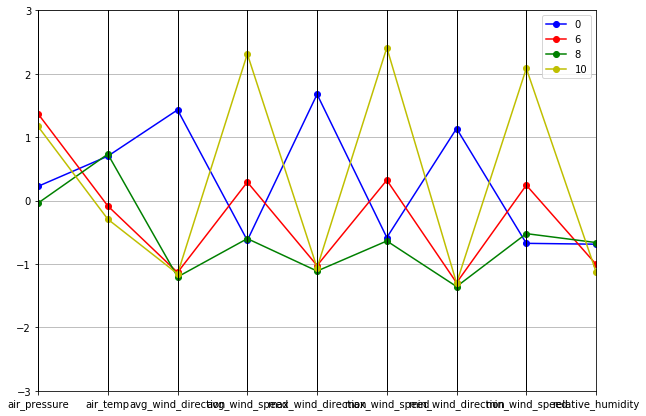

In [52]:
#Dry Days
parallel_plot(p[p['relative_humidity'] < -0.5])

/Users/kayshahbaaz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  after removing the cwd from sys.path.


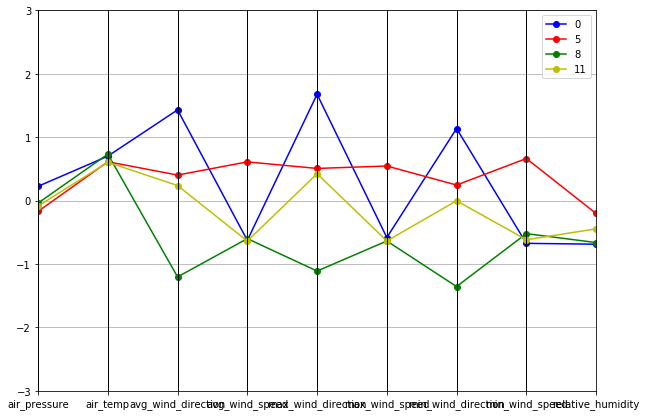

In [50]:
#warm Days
parallel_plot(p[p['air_temp'] > 0.5])

/Users/kayshahbaaz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  after removing the cwd from sys.path.


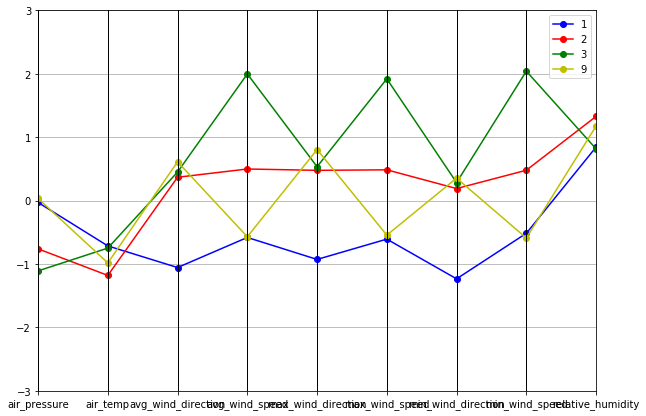

In [56]:
#Cool Days
parallel_plot(p[(p['relative_humidity'] > 0.5) & (p['air_temp'] < 0.5)])

**reference = python for data science by edX**